# 0 IMPORTS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Loading the dataset

In [4]:
file_path = '/content/data.csv'
df = pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# drop last column (extra column added by pd)
# and unnecessary first column (id)
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)

In [7]:
# 'diagnosis' is class label(target) B for benign and M for malignant
# let us observe the distribution of class label
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Let us understand feature columns. `df.describe()` function fetches you descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.


In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In above statistical description, we can observe the values across feature columns fall in varying scale. Normalization is one of the many feature engineering techniques that we are going to use. Normalization is the process of converting a range of values, into a standard range of values, typically in the interval [−1, 1] or [0, 1].


In [29]:
from sklearn.preprocessing import MinMaxScaler

label = df.loc[:,'diagnosis']
Y = {'M':1,'B':0}
Y = label.map(Y)
X = df.iloc[:,1:]

X_normalized = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X_normalized)

In [10]:
X.shape

(569, 30)

# 2 MODEL BUILDING
We are going to adress a classification problem of predicting the class labels of a breast cancer dataset i.e, a given instance is Malignant(1) or Benign(0).
For this problem we are going to train a Sequential model of Keras API in TensorFlow. 
Here, we will try to find out the best set of hyperparameters that minimizes the loss function to the maximum extend. In other words, we will look for the parameter set that provides the most accurate solution using Keras Tuner

In [31]:
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [39]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
print("TensorFlow version :", tf.__version__)

TensorFlow version : 2.6.0


First let us build a model by manually selecting hyperparameters and observe how the model could learn.

In [68]:
model = keras.Sequential([
        layers.Dense(8, activation = 'relu',input_shape= [30]),
        layers.Dense(16,activation='relu'),
        layers.Dense(16,activation='relu'),
        layers.Dense(1,activation='sigmoid')# 'sigmoid activation'
])

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#Since we are adressing a binary classification problem, 
#we use 'binary crossentropy'

history = model.fit(
          X_train,Y_train,
          validation_data=(X_test,Y_test),
          batch_size=1,
          epochs = 250,
)

Epoch 1/250
455/455 [==============================] - 1s 2ms/step - loss: 0.6393 - accuracy: 0.6571 - val_loss: 0.5794 - val_accuracy: 0.8772
Epoch 2/250
455/455 [==============================] - 1s 2ms/step - loss: 0.4793 - accuracy: 0.8659 - val_loss: 0.3302 - val_accuracy: 0.9386
Epoch 3/250
455/455 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9231 - val_loss: 0.1651 - val_accuracy: 0.9737
Epoch 4/250
455/455 [==============================] - 1s 2ms/step - loss: 0.1789 - accuracy: 0.9341 - val_loss: 0.1442 - val_accuracy: 0.9386
Epoch 5/250
455/455 [==============================] - 1s 2ms/step - loss: 0.1505 - accuracy: 0.9341 - val_loss: 0.0917 - val_accuracy: 0.9825
Epoch 6/250
455/455 [==============================] - 1s 2ms/step - loss: 0.1251 - accuracy: 0.9538 - val_loss: 0.0968 - val_accuracy: 0.9649
Epoch 7/250
455/455 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9560 - val_loss: 0.0678 - val_accuracy: 0.9912

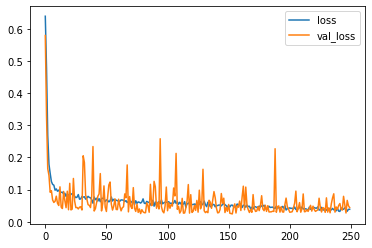

In [69]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot();

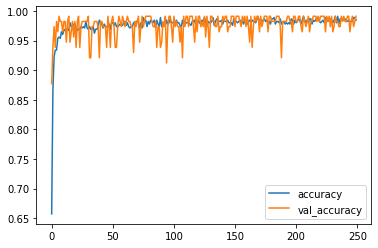

In [70]:
history_df.loc[:, ['accuracy','val_accuracy']].plot();